# Chapter11. NLP 를 위한 합성곱 신경망 (Convolution Neural Network)


# 1. 합성곱 신경망 (Convolution Neural Network)
1-1) 합성곱 신경망이란
-  합성곱층 (Convolution layer) + 풀링층 (Pooling layer)
- 합성곱층 : CONV(합성곱 연산) + 활성화함수(ex ReLU)
- 다층 퍼셉트론 : 몇 가지 픽셀만 값이 달라져도 민감하게 예측에 영향 받음
- 합성곱 신경망 : 이미지의 공간적인 구조 정보 보존하며 학습

1-2) 채널(Channel)
- 이미지 : (높이, 너비, 채널)의 3차원 텐서
- 높이 : 세로 방향 픽셀 수, 너비 : 가로 방향 픽셀 수
- 채널 : 색 성분

ex) 28*28 픽셀의 흑백 이미지는 (28 x 28 x 1)크기를 가지는 3차원 텐서

ex) 컬러 이미지는 3개의 채널(RGB) 가짐 -> 28*28 픽셀의 컬러 이미지는 (28 x 28 x 3)크기를 가지는 3차원 텐서


1-3) 합성곱 연산 (Convolution operation)
- 합성곱층 : 합성곱 연산 통해 이미지의 특징 추출
- 커널 (kernel)(=필터)로 이미지 높이*너비를 가장 왼쪽부터 가장 오른쪽 아래까지 겹치며 훑음
- 겹쳐지는 이미지와 커널의 원소값을 모두 곱하고 더해 출력
- 특성 맵(feature map) :  입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과
- 커널의 크기, 이동 범위(스트라이드, stride)는 사용자가 지정 가능

1-4) 패딩 (Padding)
- 특성 맵 (합성곱 연산의 결과)은 입력보다 크기가 작아짐
- 패딩
 - 합성곱 연산 전, 입력의 가장자리에 지정된 개수의 폭만큼 행과 열 추가
 - 주로 0을 채우는 제로 패딩 사용
 - 합성곱 연산 이후에도 특성 맵의 크기가 입력 크기와 동일하게 만들기 위해 사용


1-5) 가중치와 편향
- 합성곱 신경망의 가중치 = 커널 행렬의 원소
 - 합성곱 신경망의 가중치 개수 = 커널 행렬의 원소 수
 - 다층 퍼셉트론보다 훨씬 적은 수의 가중치 사용하여 공간적 구조 정보 보존
 - 특성 맵은 비선형성 추가를 위해 활성화 함수 지나게 됨
 - 합성곱 층 (convolution layer) : 합성곱 신경망에서 "합성곱 연산 -> 특성맵으로 활성화함수 지나는 연산"을 하는 층
- 합성곱 신경망의 편향
 - 합성곱 신경망에도 커널 적용 후 편향 추가 가능.
 - 편향은 하나의 값만 존재, 커널 적용된 결과의 모든 원소에 더해짐


1-6) 특성 맵의 크기 계산
- 입력 크기, 커널 크기, 스트라이드 값으로 특성 맵 크기 계산 가능

1-7) 다수의 채널을 가지는 경우의 합성곱 연산 (3 차원 텐서의 합성곱 연산)
- 커널의 채널 수도 입력의 채널 수만큼 존재해야 함 (입력 데이터 채널 수 = 커널의 채널 수)
- (입력 데이터의 채널 수가 n인 경우) n개의 커널이 아닌, n개의 채널을 가진 1개의 커널임 주의
- 여러개의 커널 사용한 합성곱 연산도 가능
- 채널마다 합성곱 연산 수행 -> 결과 모두 더함 = 최종 특성맵

1-8) 3 차원 텐서의 합성곱 연산
- 다수의 커널 사용하는 합성곱 연산에서, 사용한 커널 수 = 특성 맵의 채널 수


1-9) 풀링 (Pooling)
- 특성 맵을 다운샘플링하여 특성 맵의 크기 줄이는 풀링연산
- 최대 풀링 (max pooling)
 - 커널과 겹치는 영역 안에서 최대값 추출하는 방식으로 다운샘플링
- 평균 풀링 (average pooling)
 -  커널과 겹치는 영역 안에서 평균값 추출하는 방식으로 다운샘플링
- 합성곱 연산과의 차이점 : 학습할 가중치 x, 연산 후 채널 수 변화 없음

# 2. 자연어 처리를 위한 1D CNN(1D Convolutional Neural Networks)
2-1) 2D 합성곱 (2D Convolutions)
-  이미지 처리에서의 합성곱 연산

2-2) 1D 합성곱 (1D Convolutions)
- 합성곱 신경망을 자연어 처리에서 사용하기 위한 1D CNN
- 입력 : 각 단어가 벡터로 변환된 문장 행렬 (문장 -> 토큰화 -> 패딩 - > 임베딩 -> 1D 합성곱의 입력)
- "커널의 높이 = 해당 커널의 크기"라고 간주 -> 커널의 높이 = 해당 커널의 크기, 너비 = 임베딩 벡터의 차원이 됨
- 커널의 너비 = 임베딩 벡터의 차원
 - 너비 방향으로는 더이상 움직일 곳이 없음
 - 커널이 높이 방향(아래)로만 이동
- 커널의 크기
 - 참고하는 단어의 묶음의 크기가 달라짐 = 참고하는 n-gram이 달라짐
 - ex) 커널의 크기=2 -> 각 연산의 스텝에서 참고하는 것은 bigram
 - ex) 커널의 크기=3 -> 각 연산의 스텝에서 참고하는 것은 trigram

2-3) 맥스 풀링 (Max‑pooling)
- 1D CNN의 합성곱층 다음에 풀링층 추가. 주로 맥스풀링 사용
- 각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산

2-4) 텍스트 분류를 위한 CNN 설계
- 이진 분류를 위한 신경망, 소프트맥스 함수 사용 -> 출력층에서 뉴런의 개수 2
 - 크기가 4인 커널 2개, 3인 커널 2개, 2인 커널 2개를 사용
 - 합성곱 연산 후 총 6개의 벡터 얻게 됨
 - 6개의 벡터에 각각 맥스풀링 -> 6개의 스칼라
 - 6개 스칼라값을 뉴런이 2 개인 출력층에 완전 연결 (Dense layer 를 사용)

질문 ) 왜 같은 크기의 커널을 1개가 아닌 2개씩 사용하는지?
- 학습 가능한 매개변수의 수를 늘려 모델의 표현력을 향상시키기 위함
 - 모델이 학습할 수 있는 매개변수의 수가 많을수록, 모델은 더 복잡한 함수를 모델링할 수 있음 -> 같은 크기의 여러 개의 커널을 사용하면 모델의 매개변수 수가 증가하게 되어, 모델의 표현력 향상
- 각각의 커널이 데이터의 서로 다른 부분을 병렬로 처리 가능
 - 모델은 입력 데이터에서 다양한 특징을 추출 -> 더 효과적인 학습

2-5) 케라스 (Keras) 로 CNN 구현하기
- num_filters = 커널의 개수.
- kernel_size = 커널의 크기.
- padding = 패딩 방법.
 - valid : 패딩 없음. 제로 패딩없이 유효한 (valid) 값만을 사용한다는 의미에서 valid.
 - same : 합성곱 연산 후에 출력이 입력과 동일한 차원을 가지도록 왼쪽과 오른쪽 (또는 위, 아래) 에 제로
패딩을 추가.
- activation = 활성화 함수.

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import Sequential

num_filters = 4 # 4개 커널 사용
kernel_size = 2 # 커널 크기 2

model = Sequential()
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))

In [ ]:
# 맥스풀링을 추가하는 경우
model = Sequential()
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())

# 3. 1D CNN 으로 IMDB 리뷰 분류하기

3-1) 데이터 전처리

In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000 # 최대 10,000개 단어 허용하여 데이터 로드
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
print(X_train[:5]) # 샘플들이 정수 인코딩 된 상태

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
# 패딩 - 샘플 길이 200으로 맞추기
max_len = 200
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (25000, 200)
X_test의 크기(shape) : (25000, 200)


In [ ]:
print(y_train[:5])

[1 0 0 1 0]


3-2) 1D CNN 으로 IMDB 리뷰 분류하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential() # Sequential 모델(Keras 모델의 기본적인 형태)을 생성
model.add(Embedding(vocab_size, 256)) # 단어 임베딩 레이어 / 임베딩 벡터의 차원 : 256
model.add(Dropout(0.3)) # 드롭 아웃 비율 : 0.3
model.add(Conv1D(256, 3, padding='valid', activation='relu')) # 커널 크기 : 3, 커널 총 256 개 사용
model.add(GlobalMaxPooling1D()) # 맥스풀링 수행
model.add(Dense(128, activation='relu')) # 완전 연결 레이어 / 은닉층의 뉴런 수 : 128 / 활성화 함수 : ReLU
model.add(Dropout(0.5)) # 드롭 아웃 비율 : 0.5
model.add(Dense(1, activation='sigmoid')) # 이진 분류 모델이므로 활성화함수 시그모이드

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 256)         196864    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
# 검증 데이터 손실 증가=과적합 징후 -> 검증 데이터 손실이 3회 증가하면 학습 조기 종료
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
# 검증 데이터의 정확도가 이전보다 좋아지는 경우에만 모델 저장

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc']) # 손실함수 : 크로스엔트로피
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), callbacks=[es, mc]) # 20 에포크를 수행

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.4272 - acc: 0.7887
Epoch 1: val_acc improved from -inf to 0.87812, saving model to best_model.h5
782/782 [==============================] - 270s 343ms/step - loss: 0.4272 - acc: 0.7887 - val_loss: 0.2908 - val_acc: 0.8781
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - ETA: 0s - loss: 0.2221 - acc: 0.9140
Epoch 2: val_acc improved from 0.87812 to 0.88744, saving model to best_model.h5
782/782 [==============================] - 221s 283ms/step - loss: 0.2221 - acc: 0.9140 - val_loss: 0.2709 - val_acc: 0.8874
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.1207 - acc: 0.9574
Epoch 3: val_acc did not improve from 0.88744
782/782 [==============================] - 221s 283ms/step - loss: 0.1207 - acc: 0.9574 - val_loss: 0.3105 - val_acc: 0.8855
Epoch 4/20
782/782 [==============================] - ETA: 0s - loss: 0.0498 - acc: 0.9832
Epoch 4: val_acc did not improve from 0.88744
782/782 [==============================] - 209s 267ms/step - loss: 0.0498 - acc: 0.9832 - val_loss: 0.3974 - val_acc: 0.8825
Epoch 5/20
782/782 [==============================] - ETA: 0s - loss: 0.0309 - acc: 0.9894
Epoch 5: val_acc did not improve from 0.88744
782/782 [==============================] - 260s 333ms

실행 결과 epoch 5 에서 조기종료됨

In [ ]:
# 저장된 모델 로드, 테스트 정확도 확인
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 40s 51ms/step - loss: 0.2709 - acc: 0.8874

 테스트 정확도: 0.8874


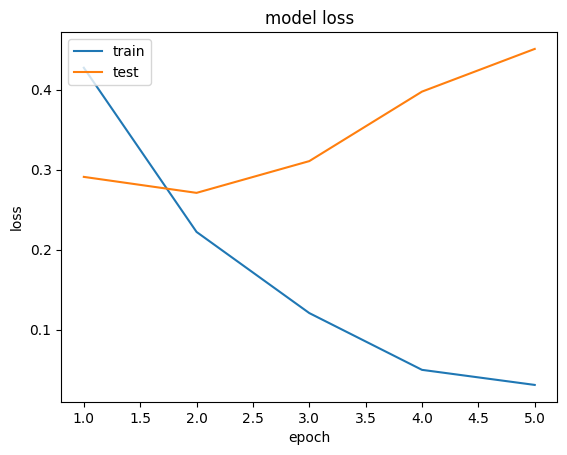

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()